<a href="https://colab.research.google.com/github/yogesh7132/Exploratory-Data-Analysis/blob/master/IPL_Analysis/IPL_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import dataset
matches = pd.read_csv("https://raw.githubusercontent.com/yogesh7132/Exploratory-Data-Analysis/master/IPL_Analysis/Dataset/matches.csv")
score = pd.read_csv("https://raw.githubusercontent.com/yogesh7132/Exploratory-Data-Analysis/master/IPL_Analysis/Dataset/deliveries.csv")

In [3]:
# dimensions of dataset
matches.shape

(636, 18)

In [4]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
# brief info about dataset
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [6]:
score.shape

(150460, 21)

In [7]:
score.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


### Data Cleaning




In [8]:
# Null values in percentage
matches.isnull().sum()/ matches.shape[0] *100

id                   0.000000
season               0.000000
city                 1.100629
date                 0.000000
team1                0.000000
team2                0.000000
toss_winner          0.000000
toss_decision        0.000000
result               0.000000
dl_applied           0.000000
winner               0.471698
win_by_runs          0.000000
win_by_wickets       0.000000
player_of_match      0.471698
venue                0.000000
umpire1              0.157233
umpire2              0.157233
umpire3            100.000000
dtype: float64

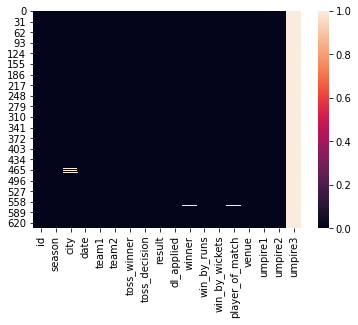

In [9]:
sns.heatmap(matches.isnull())

As, umpire3 contains all NULL values. So, we will remove that column


In [10]:
matches.drop("umpire3", axis=1, inplace=True)

In [11]:
# Null values in percentage
score.isnull().sum()/score.shape[0] * 100

match_id             0.000000
inning               0.000000
batting_team         0.000000
bowling_team         0.000000
over                 0.000000
ball                 0.000000
batsman              0.000000
non_striker          0.000000
bowler               0.000000
is_super_over        0.000000
wide_runs            0.000000
bye_runs             0.000000
legbye_runs          0.000000
noball_runs          0.000000
penalty_runs         0.000000
batsman_runs         0.000000
extra_runs           0.000000
total_runs           0.000000
player_dismissed    95.056493
dismissal_kind      95.056493
fielder             96.431610
dtype: float64

player_dismissed , dismissal_kind & fielder are having NULL values more than 95%.


In [12]:
matches["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [13]:
# Replace team name with abbreviation
matches.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS'], inplace=True)

score.replace(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],['SRH','MI','GL','RPS','RCB','KKR','DD','KXIP','CSK','RR','DC','KTK','PW','RPS'], inplace=True)

## Exploratory Data Analysis


In [14]:
print("Total Matches Played :", matches.shape[0],"\n")
print("Played by Teams : ",matches['team1'].unique(),"\n")
print("Venue Played at :", matches["city"].unique())

Total Matches Played : 636 

Played by Teams :  ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW'] 

Venue Played at : ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]


In [15]:
print("Total Venues :", matches["city"].nunique())
print("Total Umpires :", matches["umpire1"].nunique())

Total Venues : 30
Total Umpires : 44


In [18]:
df = matches.iloc[[matches["win_by_runs"].idxmax()]]
df[['id','season','team1','team2','winner','win_by_runs']]

,id,season,team1,team2,winner,win_by_runs
43,44,2017,MI,DD,MI,146


Mumbai Indians defeated Delhi Daredevils with the highest run difference

In [25]:
df = matches.iloc[[matches['win_by_wickets'].idxmax()]]
df[['id','season','team1','team2','winner','win_by_wickets']]

,id,season,team1,team2,winner,win_by_wickets
2,3,2017,GL,KKR,KKR,10


Kolkata Knight Riders(KKR) defeated Gujarat Lions(GL) with the highest wickets difference


### Number of Matches per session


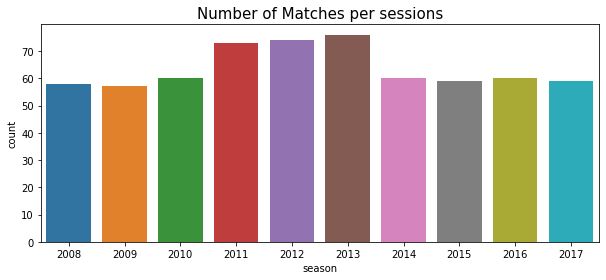

In [47]:
# Matches played in every sessions
plt.figure(figsize=(10,4))
sns.countplot(x= "season", data=matches)
plt.title("Number of Matches per sessions", fontsize=15)
plt.show()

The year 2013 has most number of matches and 2010 less number of matches


### Most number of winning team


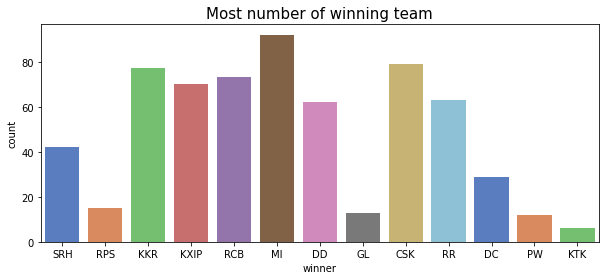

In [50]:
# which team has won maximum number of matches
plt.figure(figsize=(10,4))
sns.countplot( x='winner', data = matches, palette="muted")
plt.title("Most number of winning team", fontsize=15)
plt.show()

Mumbai Indians have won most of the matches in the IPL


### Is Toss Winner Also the Match Winner?



In [51]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


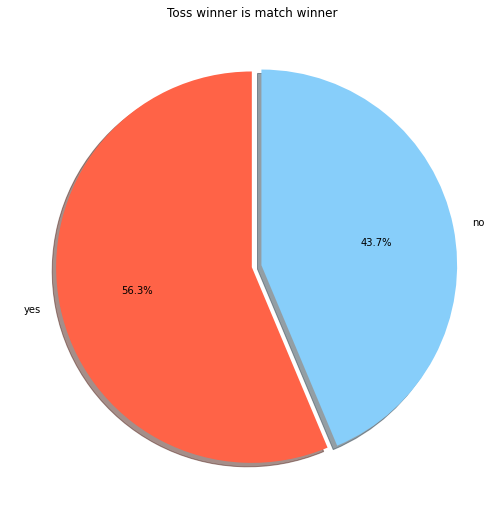

In [82]:
df = matches[matches["toss_winner"]==matches["winner"]]
slices=[len(df),577-len(df)]
labels = ["yes","no"]
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0.05),autopct='%1.1f%%',colors=['tomato','lightskyblue'])
fig = plt.gcf()
fig.set_size_inches(9,9)
plt.title("Toss winner is match winner")
plt.show()

There are 50-50 chances for both.

### Favorite Ground

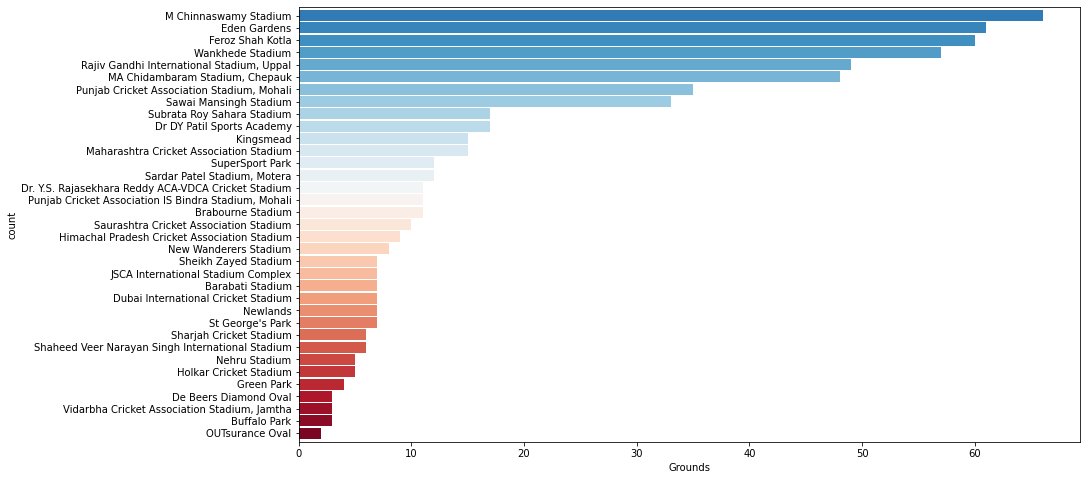

In [74]:
plt.subplots(figsize=(14,8))
ax = matches['venue'].value_counts().sort_values(ascending=True).plot.barh(width=.9,color=sns.color_palette('RdBu',40))
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.show()

###  Top cities where the matches are held

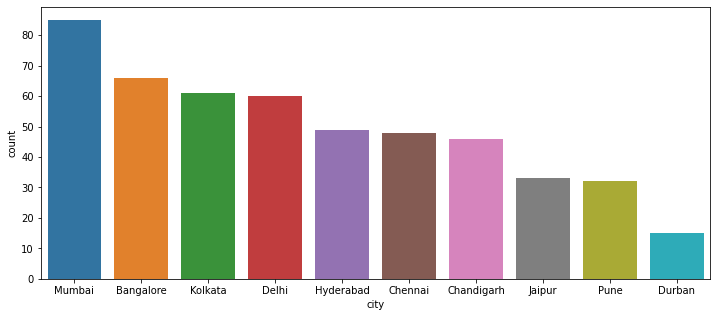

In [77]:
plt.figure(figsize=(12,5))
fav_cities = matches['city'].value_counts().reset_index()
fav_cities.columns = ['city','count']
sns.barplot(y = 'count',x = 'city', data = fav_cities[:10])
plt.show()

Mumbai is the top city where most number of matches have occured

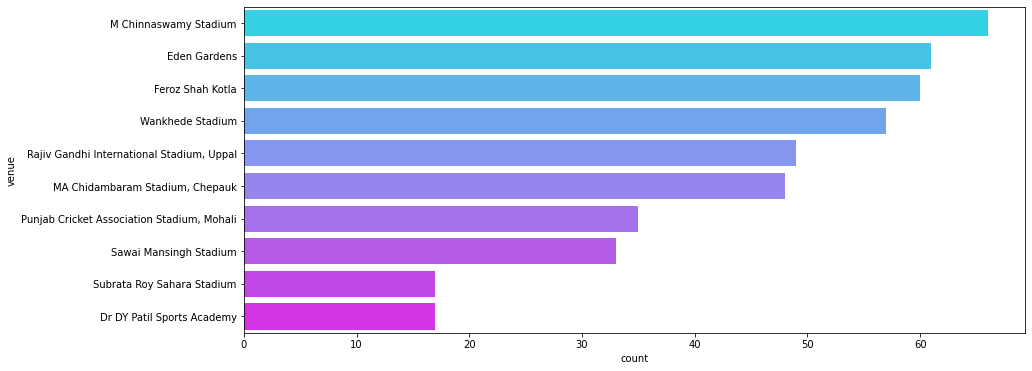

In [87]:
plt.figure(figsize=(14,6))
fav_ground = matches['venue'].value_counts().reset_index()
fav_ground.columns = ['venue','count']
sns.barplot(x = 'count',y = 'venue', data = fav_ground[:10], palette = 'cool')
plt.show()

### Toss Decisions

In [89]:
print('Toss Decisions in %\n',((matches['toss_decision']).value_counts())/577*100)

Toss Decisions in %
 field    62.911612
bat      47.313692
Name: toss_decision, dtype: float64


### Toss Decisions across Seasons

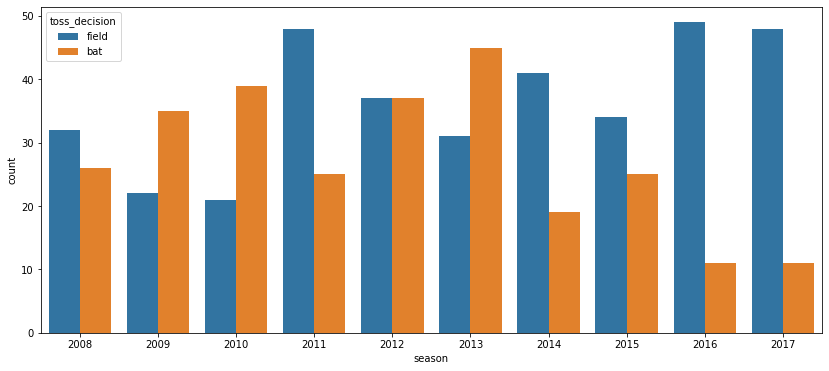

In [92]:
plt.subplots(figsize=(14,6))
sns.countplot(x='season',hue='toss_decision',data=matches)
plt.show()

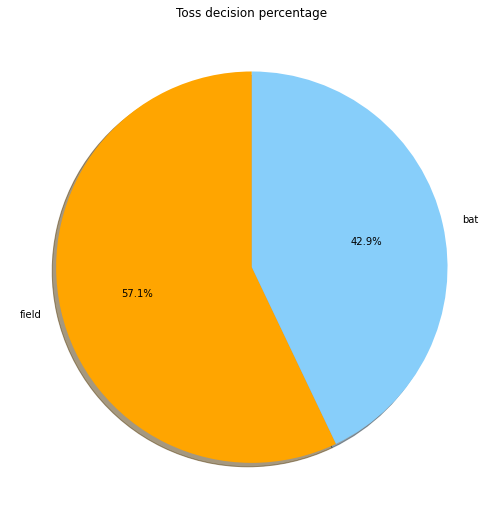

In [95]:
plt.subplots(figsize=(15,9))
temp_series = matches.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['orange', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

So percentage of times teams batting second has won is 53.2. Now let us split this by year and see the distribution.

### Maximum Toss Winners

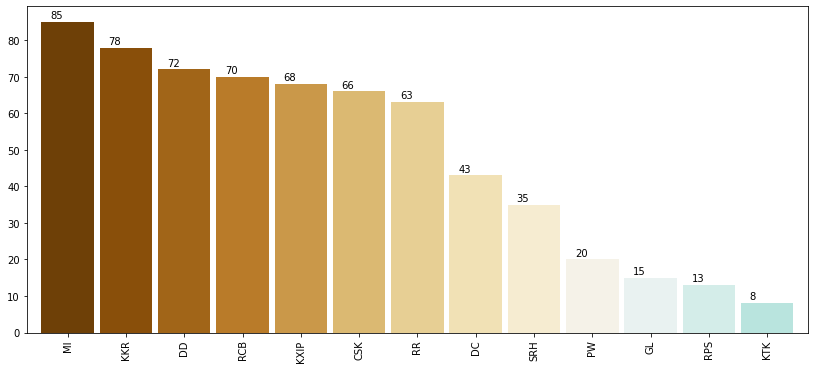

In [105]:
plt.subplots(figsize=(14,6))
ax=matches['toss_winner'].value_counts().plot.bar(width=0.9,color=sns.color_palette('BrBG',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

### Maximum Man Of Matches

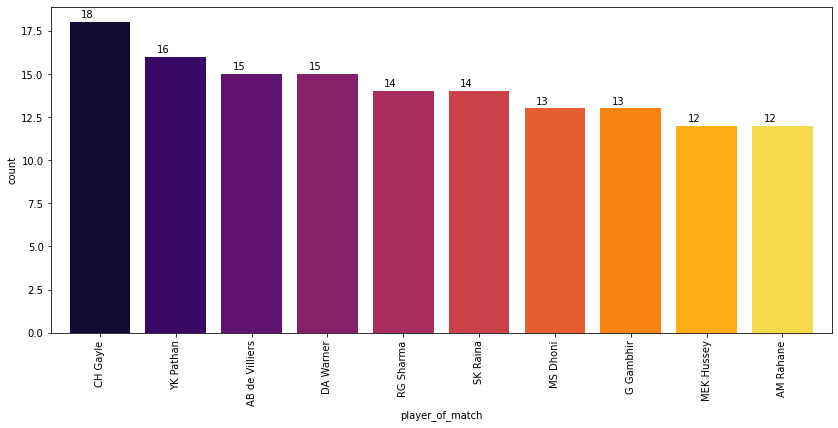

In [107]:
plt.subplots(figsize=(14,6))
#the code used is very basic but gets the job done easily
ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))  #counts the values corresponding 
# to each batsman and then filters out the top 10 batsman and then plots a bargraph 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

### Winning Year

In [111]:
for i in range(2008,2017):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]].values)

[2008 'RR']
[2009 'DC']
[2010 'CSK']
[2011 'CSK']
[2012 'KKR']
[2013 'MI']
[2014 'KKR']
[2015 'MI']
[2016 'SRH']


### Top players of the IPL

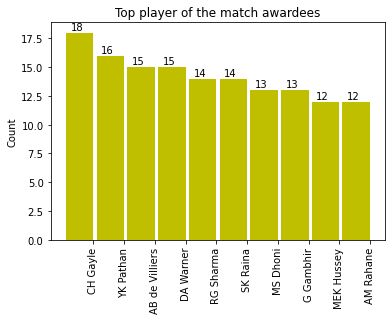

In [112]:
player = matches.player_of_match.value_counts()[:10]
labels = np.array(player.index)
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots()
rects = ax.bar(ind, np.array(player), width=width, color='y')
ax.set_xticks(ind+((width)/2.))
ax.set_xticklabels(labels, rotation='vertical')
ax.set_ylabel("Count")
ax.set_title("Top player of the match awardees")
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

### Most boundries of the player

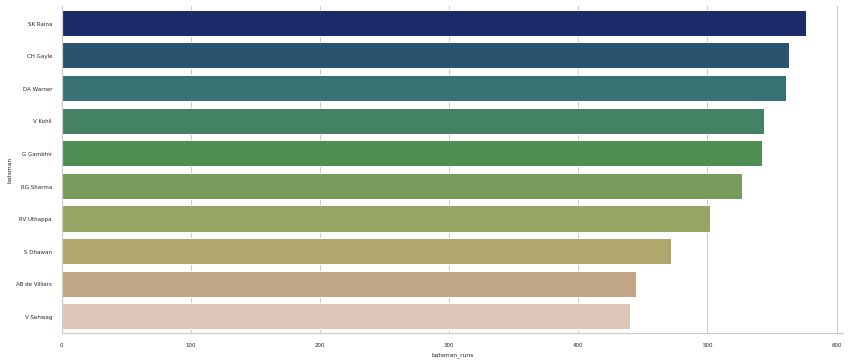

In [122]:
# player with most boundries
data = score[(score['batsman_runs'] == 4) | (score['batsman_runs'] == 6)][['batsman','batsman_runs']].groupby('batsman').count().reset_index().sort_values(ascending = False, by = 'batsman_runs')
plt.subplots(figsize=(14,6))
sns.set_style("whitegrid")
sns.despine()
sns.set_context("notebook", font_scale=0.5, rc={"lines.linewidth": 2.5})
sns.barplot(x = 'batsman_runs', y = 'batsman', data = data[:10],palette="gist_earth")